In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# 1-1 Mnist

Tr,Te = tfds.load(name = 'mnist', split=['train','test'], as_supervised=True,batch_size=-1)

#tfds.as_numpy 사용 하여 텐서플로우 데이터셋을 넘파이 배열로 변환

X_train,y_train = tfds.as_numpy(Tr)
X_test,y_test = tfds.as_numpy(Te)

#텐서 모양 확인
print("The Shape of MNIST:")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


In [ ]:
#1-2 CIFAR -10

Tr,Te = tfds.load(name = 'cifar10', split=['train','test'], as_supervised=True,batch_size=-1)

#tfds.as_numpy 사용 하여 텐서플로우 데이터셋을 넘파이 배열로 변환   
X_train,y_train = tfds.as_numpy(Tr)
X_test,y_test = tfds.as_numpy(Te)

#텐서 모양 확인
print("The Shape of CIFAR-10:")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


In [ ]:
# 정형 데이터 MLP 학습
##2-1 MNIST에 대한 MLP 학습 준비
import numpy as np
import tensorflow as tf
#from keras.datasets import mnist

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
#MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Raw MNIST Data:")
print("Train")
print(X_train.shape)
print(y_train.shape)
print("Test")
print(X_test.shape)
print(y_test.shape)

#Training Set에는 28*28 이미지가 60,000개

#Test Set에는 28*28 이미지가 10,000개


#MLP에서 이용 가능한 형태로 가공하기 : 60,000 * (28*2*28) -> 60,000 * 784

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print("\nFlatten MNIST Data:")
print(X_train.shape)
print(X_test.shape)

#ndarray로 변환하여 [0,1] 구간으로 이동시키기
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
print("\nNormalized MNIST Data:")
print(X_train[0,:])
print(X_test[0,:])

#y레이블을 원 핫 코드로 변환하기
print(y_train[0])
print(y_test[0])

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print("\nOne-hot encoded MNIST labels:")

print(y_train[0,:])
print(y_test[0,:])


In [ ]:
## 2-2 MNIST에 대한 MLP 학습

#신경망 설계

n_input = X_train.shape[1] # 784 =(28*28)
n_hidden = [128] #은닉층 노드 수, 여러개일 수 있으니 배열로
n_output = 10  #출력층 노드 수

mlp_model = Sequential()
mlp_model.add(Dense(units=n_hidden[0], activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp_model.add(Dense(units=n_output, activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# Adam 옵티마이저 생성 및 learning_rate 설정
optimizer = Adam(learning_rate=0.001)
mlp_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
# #학습
# mlp_model.fit(X_train, y_train, epochs=8, batch_size=100, validation_data=(X_test, y_test))
# #출력  
# loss, accuracy = mlp_model.evaluate(X_test, y_test)
# print("Test Loss:", loss)

In [ ]:
##2-3 신경망 학습
#신경망 학습 및 히스토리 보존
hist = mlp_model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test),verbose=2)

res = mlp_model.evaluate(X_test, y_test, verbose =0)
print("[Err,Acc] = : ",res) 

In [ ]:
#show the accruacy graph
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [6]:
# mnist fashion 데이터 셋 학습
##3-1 Fashion MNIST에 대한 MLP 학습 준비
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD


#Fashion MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() #데이터셋 로드
X_train = X_train.reshape(60000, 784) #데이터셋 가공
X_test = X_test.reshape(10000, 784) #데이터셋 가공
X_train = X_train.astype(np.float32) / 255 # nd array로 변환   
X_test = X_test.astype(np.float32) / 255 # nd array로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10) #원 핫 코드로 변환

y_test = tf.keras.utils.to_categorical(y_test, 10) #원 핫 코드로 변환



print("Raw Fashion MNIST Data:")
print("Train")
print(X_train.shape)
print(y_train.shape)
print("Test")
print(X_test.shape)
print(y_test.shape)

#Training Set에는 28*28 이미지가 60,000개


Raw Fashion MNIST Data:
Train
(60000, 784)
(60000, 10)
Test
(10000, 784)
(10000, 10)


Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6902 - loss: 0.0249 - val_accuracy: 0.8338 - val_loss: 0.0139
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.0125 - val_accuracy: 0.8586 - val_loss: 0.0115
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8765 - loss: 0.0103 - val_accuracy: 0.8663 - val_loss: 0.0105
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8831 - loss: 0.0094 - val_accuracy: 0.8702 - val_loss: 0.0102
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8896 - loss: 0.0088 - val_accuracy: 0.8790 - val_loss: 0.0095
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8975 - loss: 0.0082 - val_accuracy: 0.8791 - val_loss: 0.0093
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9031 - loss: 0.0077 - val_accuracy: 0.8829 - val_loss: 0.0089
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9060 - loss: 0.0074 - val_accuracy: 0.

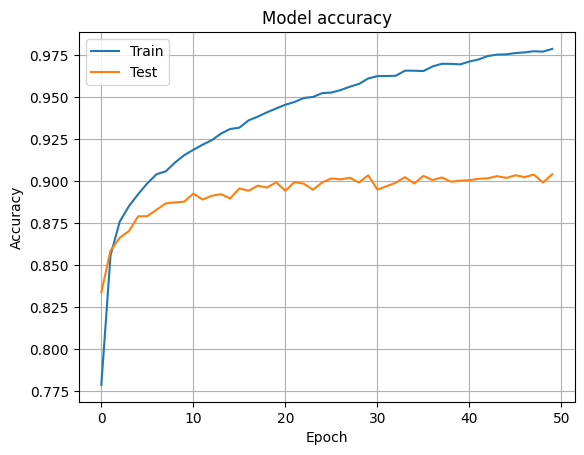

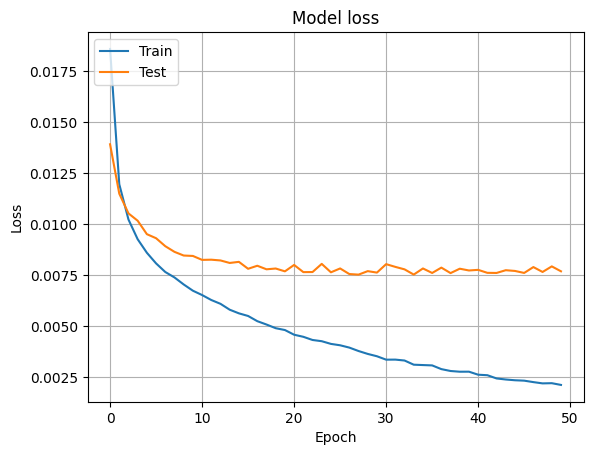

In [17]:
n_input = X_train.shape[1] # 784 =(28*28)
n_hidden = [512,256] #은닉층 노드 수, 여러개일 수 있으니 배열로, 데이터셋 자체가 작으니 레이어를 작게 유지하는게 좋다
n_output = 10 #출력층 노드 수

#신경망 구조 설계

mlp = Sequential()
mlp.add(Dense(units=n_hidden[0], activation='relu',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden[1], activation='relu',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros')) #출력층



#신경망 학습
mlp.compile(loss='huber', optimizer=Adam(learning_rate=0.0004), metrics=['accuracy']) #러닝레이트가 중요한 변수다

hist = mlp.fit(X_train, y_train, epochs=50, batch_size=400, validation_data=(X_test, y_test),verbose=1)


#학습된 모델을 이용하여 테스트 데이터에 대한 예측 수행

res = mlp.evaluate(X_test, y_test, verbose =0)
print("[Err,Acc] = : ",res)



#show the accruacy graph
import matplotlib.pyplot as plt

# 모델 정확도 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# 격자 추가
plt.grid(True)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 모델 손실 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# 격자 추가
plt.grid(True)

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



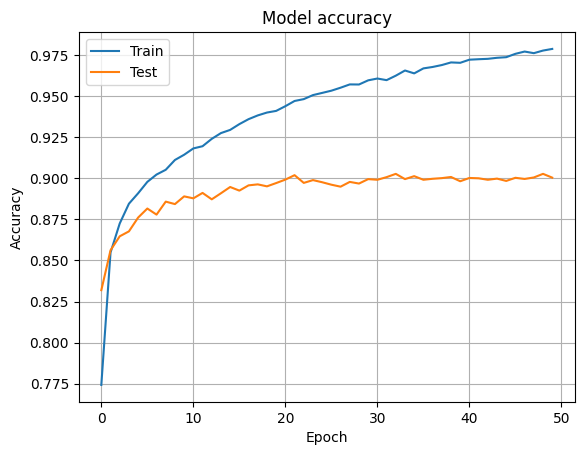

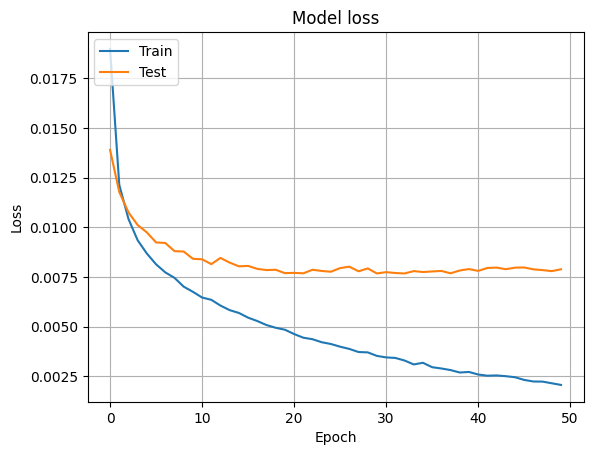

In [80]:

#show the accruacy graph
import matplotlib.pyplot as plt

# 모델 정확도 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# 격자 추가
plt.grid(True)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 모델 손실 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# 격자 추가
plt.grid(True)

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()





In [ ]:

#show the accruacy graph
import matplotlib.pyplot as plt

# 모델 정확도 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# 격자 추가
plt.grid(True)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 모델 손실 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# 격자 추가
plt.grid(True)

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()